# Notebook Initialization

In [1]:
### Importing Libraries

# Data Handling
import pandas as pd                     # For dataframe setup and manipulation
import numpy as np                      # For Numerical computations

# Visualizations
import matplotlib.pyplot as plt         # For plotting visuals
import seaborn as sns                   # For beautifying visuals

# Debugging and Timing 
import time                             # For timing the execution of cells that take a while to run  
from tqdm import tqdm_notebook          # Progress Bar

# Other
from datetime import datetime           # For manipulation of datetime variables. 

# Notebook Preferences
from IPython.core.display import display, HTML                          # 
display(HTML("<style>.container { width:80% !important; }</style>"))    # For adjusting jupyter notebook width in browserr
pd.set_option('display.max_columns', None)                              # Show all columns in any displayed df

# Data Importing & Initial Observations 

At first glance, its interesting to note that the maximum value in the "order_amount" column is \$704,000 - and the maximum in the "total_items" column is 2000. Although it is not impossible for a single user to have purchased \\$704,000 or otherwise 2000 items in a single transaction - the fact that these values are significantly greater than the means of those columns (and much more than +3 std devs away from the mean) suggests that this is something to keep an eye on when working through this problem. 

In [27]:
# Import data and set order_id as index. 
df_sneakers = pd.read_csv("C:/Users/alexa/GitHubRepos/shopify-ds-challenge/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv", index_col = [0])

# Let's first display this data to better understand the information were working with
display(df_sneakers)
df_sneakers.describe()

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:52
3,44,861,144,1,cash,2017-03-14 4:23:56
4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...
4996,73,993,330,2,debit,2017-03-30 13:47:17
4997,48,789,234,2,cash,2017-03-16 20:36:16
4998,56,867,351,3,cash,2017-03-19 5:42:42


,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.00000
mean,50.078800,849.092400,3145.128000,8.78720
std,29.006118,87.798982,41282.539349,116.32032
min,1.000000,607.000000,90.000000,1.00000
25%,24.000000,775.000000,163.000000,1.00000
50%,50.000000,849.000000,284.000000,2.00000
75%,75.000000,925.000000,390.000000,3.00000
max,100.000000,999.000000,704000.000000,2000.00000


# Calculating AOV

To calculate the AOV over a running 30 day window....

In [28]:
# First lets check that the values we have are within a 30-day window
print("Earliest Date in Dataset: " + str(df_sneakers.created_at.min()))
print("Latest Date in Dataset: " + str(df_sneakers.created_at.max()))

Earliest Date in Dataset: 2017-03-01 0:08:09
Latest Date in Dataset: 2017-03-30 9:55:00


In [29]:
# Looks like yes - we have only 30 days of data here - so we are able to just take the mean of the "order_amount" column to determine AOV
# Lets sort the values by date too for ease of handling
df_sneakers = df_sneakers.sort_values("created_at")

# The Average Order Value should be equal to the average of the "order_amount" column
print("The Average 'Order Amount' is: $" + str(df_sneakers.order_amount.mean()))

The Average 'Order Amount' is: $3145.128


As mentioned in the challenge - this doesn't seem right - as sneakers shouldn't cost this much on average. 

Investopedia.com suggests that the average cost of a pair of sneakers ranges from \\$70 - \$250. so this would indicate that our value would be over 1000% off on the low end. 

[1] https://www.investopedia.com/articles/investing/030716/economics-behind-sneakers-nke-addyy.asp 

However, when working as a data scientist - it's important to always keep in mind the business case, and to really understand the question we are answering. Here, we have taken the average *order value* and NOT the average of each item sold. As I mentioned when first looking over the dataset - we saw some very large values in the "order_amount" and "total_items" columns and it is these larger orders that are causing this value to be much higher than we had expected. Perhaps a better question to answer would be: What is the average *item* value? 

To calculate the average item value, we can create a new column that indicates the average item value per order, and then find the mean of that column. 

In [81]:
# Use pandas to create a new column called average_item_amount
df_sneakers['average_item_amount'] = df_sneakers.order_amount/df_sneakers.total_items

# Calculate the mean of that column
df_sneakers.average_item_amount.mean()

387.7428

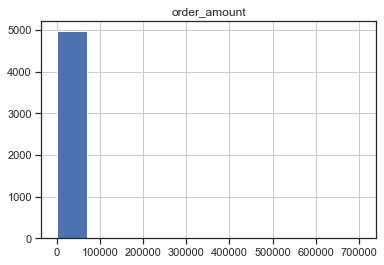

In [58]:
# Lets look at a histogram of this column to see if this may be closer to what we'd expect. 
sns.set(style = 'ticks')
plt = df_sneakers.hist(column = "average_item_amount")

This is not what we'd expect to see. A distribution like this suggests to me that there are some values that are very far away from the mean. Just for sake of 

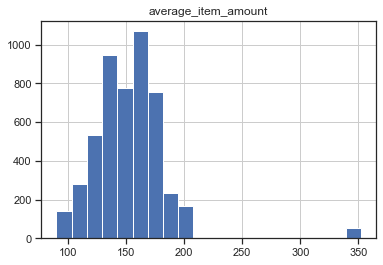

In [65]:
plt = df_sneakers[df_sneakers.average_item_amount < 24000].hist(column = "average_item_amount", bins = 20)

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
b. What metric would you report for this dataset?
c. What is its value?

In [67]:
df_sneakers.total_items.unique()

array([   4,    2,    1,    3,    5, 2000,    8,    6], dtype=int64)

In [72]:
df_sneakers.average_item_amount.unique()

df_sneakers.average_item_amount

array([  134.,   162.,   145.,   129.,   146.,   153.,   138.,   148.,
         118.,   177.,   122.,   171.,   161.,   196.,   201.,   164.,
         173.,   156.,   130.,   142.,   178.,   352.,   132.,   131.,
         172.,   158.,   160.,   165.,   133.,   101.,   163.,    94.,
         176.,   112.,   166.,   169.,   114.,   193.,   181.,   136.,
         147.,   149.,   116.,   187.,   168.,   128., 25725.,   155.,
         111.,   140.,   184.,   195.,   127.,   154.,   117.,    90.,
         190.,   144.])

In [74]:
df_sneakers[df_sneakers.average_item_amount == 25725]

,shop_id,user_id,order_amount,total_items,payment_method,created_at,average_item_amount
order_id,,,,,,,
4312,78,960,51450,2,debit,2017-03-01 3:02:10,25725.0
4041,78,852,25725,1,cash,2017-03-02 14:31:12,25725.0
2822,78,814,51450,2,cash,2017-03-02 17:13:25,25725.0
4413,78,756,51450,2,debit,2017-03-02 4:13:39,25725.0
2493,78,834,102900,4,debit,2017-03-04 4:37:34,25725.0
4716,78,818,77175,3,debit,2017-03-05 5:10:44,25725.0
4421,78,969,77175,3,debit,2017-03-09 15:21:35,25725.0
512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
3781,78,889,25725,1,cash,2017-03-11 21:14:50,25725.0


In [75]:
df_sneakers.average_item_amount.mean()

387.7428

In [76]:
df_sneakers[df_sneakers['shop_id'] != 78].average_item_amount()

,shop_id,user_id,order_amount,total_items,payment_method,created_at,average_item_amount
order_id,,,,,,,
1863,39,738,536,4,cash,2017-03-01 0:08:09,134.0
1742,39,910,268,2,cash,2017-03-01 0:10:19,134.0
3229,97,912,324,2,cash,2017-03-01 0:14:12,162.0
1268,80,798,290,2,credit_card,2017-03-01 0:19:31,145.0
2690,49,799,258,2,credit_card,2017-03-01 0:22:25,129.0
...,...,...,...,...,...,...,...
2766,9,708,236,2,debit,2017-03-30 9:22:41,118.0
4891,63,853,136,1,cash,2017-03-30 9:27:00,136.0
245,32,928,202,2,cash,2017-03-30 9:30:28,101.0


In [ ]:
#Other insights we can pull from this data... 

#Larg est order. $ or items
#Sma llest order $ 
#Be st performing store 
#B est performing store by week 
# Average order amount by store. 